In [1]:
from collections import Counter
def gini_impurity(y):
    counts=Counter(y)
    impurity=1-sum([(count/len(y))**2 for count in counts.values()])
    return impurity
gini_impurity(["m","m","m","f","f","f"])

0.5

In [2]:
gini_impurity(["m","m","m","m","f","f"])

0.4444444444444444

In [3]:
gini_impurity(["m","m","m","m","m","f"])

0.2777777777777777

In [4]:
gini_impurity(["m","m","m","m","m","m"])

0.0

In [5]:
import numpy as np
from collections import Counter
def entropy(y):
    counts=Counter(y)
    entropy=-sum([((count/len(y))*np.log2(count/len(y))) for count in counts.values()])
    return entropy
entropy(["m","m","m","m","f","f"])

0.9182958340544896

In [6]:
entropy(["m","m","m","m","m","f"])

0.6500224216483541

In [7]:
entropy(["m","m","m","m","m","f"])

0.6500224216483541

In [8]:
entropy(["m","m","m","f","f","f"])

1.0

In [10]:
import pandas as pd
data=pd.read_csv("data.csv")
data


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [11]:
data["obese"]=data["Index"].apply(lambda x:1 if x>3 else 0)
data.drop(columns="Index",inplace=True)

In [12]:
import pandas as pd
def compute_gini_impurity(data, feature_col, split_value) :
    left_branch=data [data [feature_col] >split_value]
    right_branch =data[data [feature_col] >split_value]
    total_samples=len(data)
    def calculate_impurity(branch):
        if len(branch)==0:
            return 0
        counts=Counter(branch["obese"])
        impurity=1-sum([(count/len(branch))**2 for count in counts.values()])
        return impurity
    gini_left = calculate_impurity(left_branch)
    gini_right = calculate_impurity(right_branch)
    print(gini_left,gini_right)
    weight_left=len(left_branch)/total_samples
    weight_right=len(right_branch)/total_samples
    weighted_avg_gini = (weight_left*gini_left)+(weight_right*gini_right)
    return weighted_avg_gini

In [13]:
feature_column="Gender"
split_value="Female"
gini_impurity = compute_gini_impurity(data,feature_column,split_value)
print(f"Gini impurity for split value {split_value}: {gini_impurity}")

0.44261557684298203 0.44261557684298203
Gini impurity for split value Female: 0.43376326530612236


In [14]:
import pandas as pd
def compute_entropy(data, feature_col, split_value) :
    left_branch=data [data [feature_col] <=split_value]
    right_branch =data[data [feature_col] >split_value]
    total_samples=len(data)
    def calculate_entropy(branch):
        if len(branch)==0:
            return 0
        counts=Counter(branch)
        entropy=-sum([((count/len(branch))*np.log2(count/len(branch))) for count in counts.values()])
        return entropy
    entropy_left = calculate_entropy(left_branch)
    entropy_right = calculate_entropy(right_branch)
    print(entropy_left,entropy_right)
    weight_left=len(left_branch)/total_samples
    weight_right=len(right_branch)/total_samples
    weighted_avg_entropy = (weight_left*entropy_left)+(weight_right*entropy_right)
    return weighted_avg_entropy

In [15]:
compute_entropy(data,"Height",179.5)

0.10166496989343758 0.17351701789206778


0.12623837030896912

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
x=data.drop("obese",axis=1)
y=data["obese"]
label_encoder=LabelEncoder()
x_encoded=x.apply(label_encoder.fit_transform)
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,train_size=0.8,random_state=42)
tree_classifier=DecisionTreeClassifier(random_state=7)
tree_classifier.fit(x_train,y_train)
y_pred=tree_classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy", accuracy)

Accuracy 0.97


In [17]:
tree_gini = DecisionTreeClassifier(criterion="gini",random_state=42)
tree_entropy = DecisionTreeClassifier(criterion="entropy",random_state=42)
tree_gini.fit(x_train, y_train)
tree_entropy.fit(x_train,y_train)                                     
y_pred_gini = tree_gini.predict(x_test)
y_pred_entropy=tree_entropy.predict(x_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy=accuracy_score(y_test, y_pred_entropy)
print("Accuracy with Gini Impurity:" , accuracy_gini)
print("Accuracy with Entropy:",accuracy_entropy)

Accuracy with Gini Impurity: 0.96
Accuracy with Entropy: 0.95


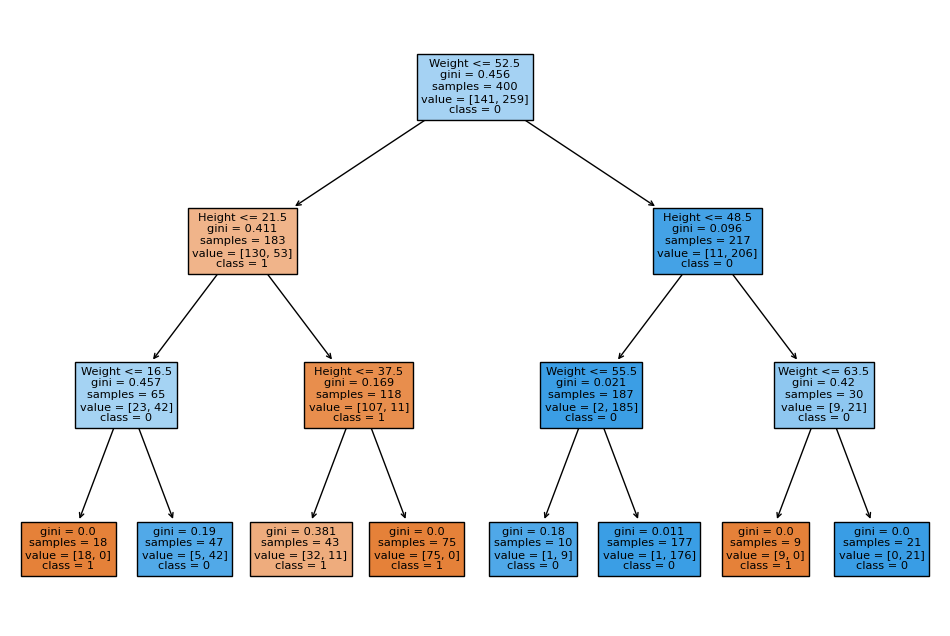

In [19]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
feature_names=list(data.columns)
class_names=data["obese"].unique().astype(str)
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=feature_names,class_names=class_names)
plt.show()

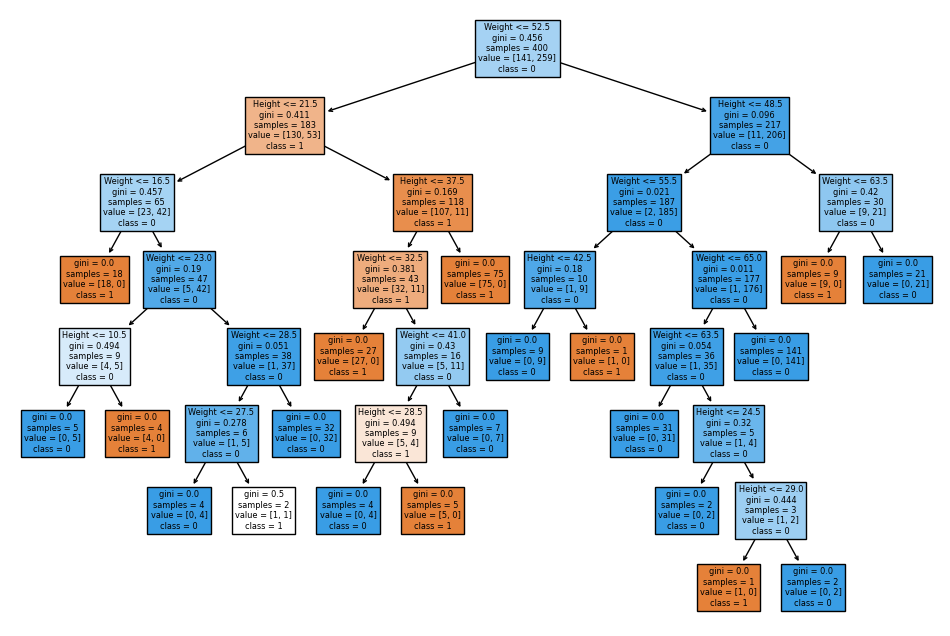

In [20]:
clf=DecisionTreeClassifier(min_samples_split=3)
clf.fit(x_train,y_train)
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=feature_names,class_names=class_names)
plt.show()

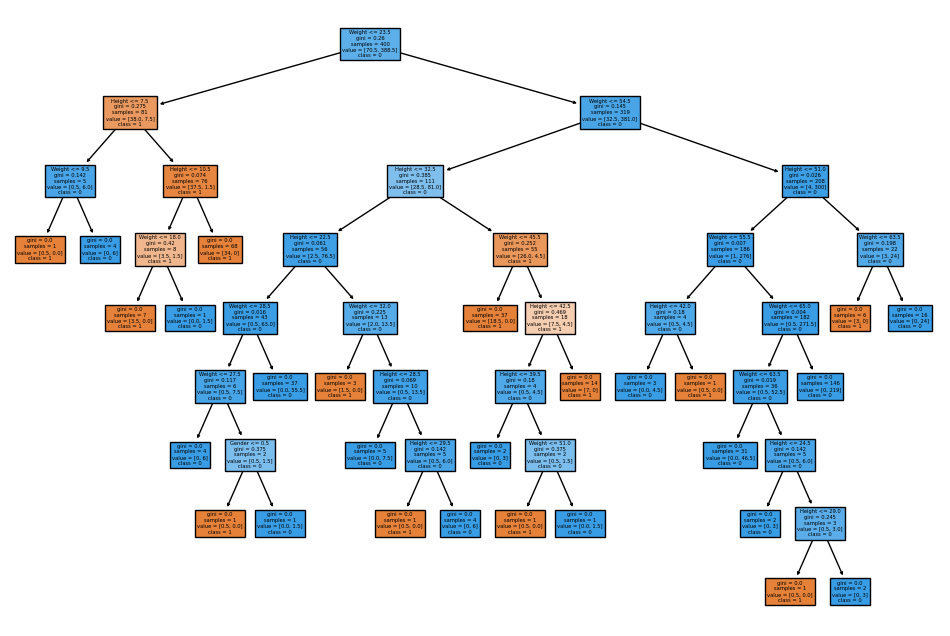

In [22]:
clf=DecisionTreeClassifier(class_weight={0:0.5,1:1.5,2:1})
clf.fit(x_train,y_train)
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=feature_names,class_names=class_names)
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,random_state=7)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.96
